**Task 1**

In [2]:
%pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 12.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import numpy as np

In [ ]:
contamination = 0.15
X_train, X_test, y_train, y_test = generate_data(
    n_train=300, n_test=200, n_features=3, contamination=contamination, random_state=42
)

def plot_3d(ax, X, y, title):
    ax.set_title(title)
    ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], c='blue', label='Inliers', alpha=0.6)
    ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='red', label='Outliers', alpha=0.6)
    ax.legend()


In [ ]:
ocsvm_linear = OCSVM(kernel='linear', contamination=contamination)
ocsvm_linear.fit(X_train)
y_test_pred_linear = ocsvm_linear.predict(X_test)

bal_acc_linear = balanced_accuracy_score(y_test, y_test_pred_linear)
roc_auc_linear = roc_auc_score(y_test, ocsvm_linear.decision_function(X_test))
print("OCSVM Linear Kernel - Balanced Accuracy:", bal_acc_linear)
print("OCSVM Linear Kernel - ROC AUC:", roc_auc_linear)


OCSVM Linear Kernel - Balanced Accuracy: 0.9833333333333334
OCSVM Linear Kernel - ROC AUC: 1.0


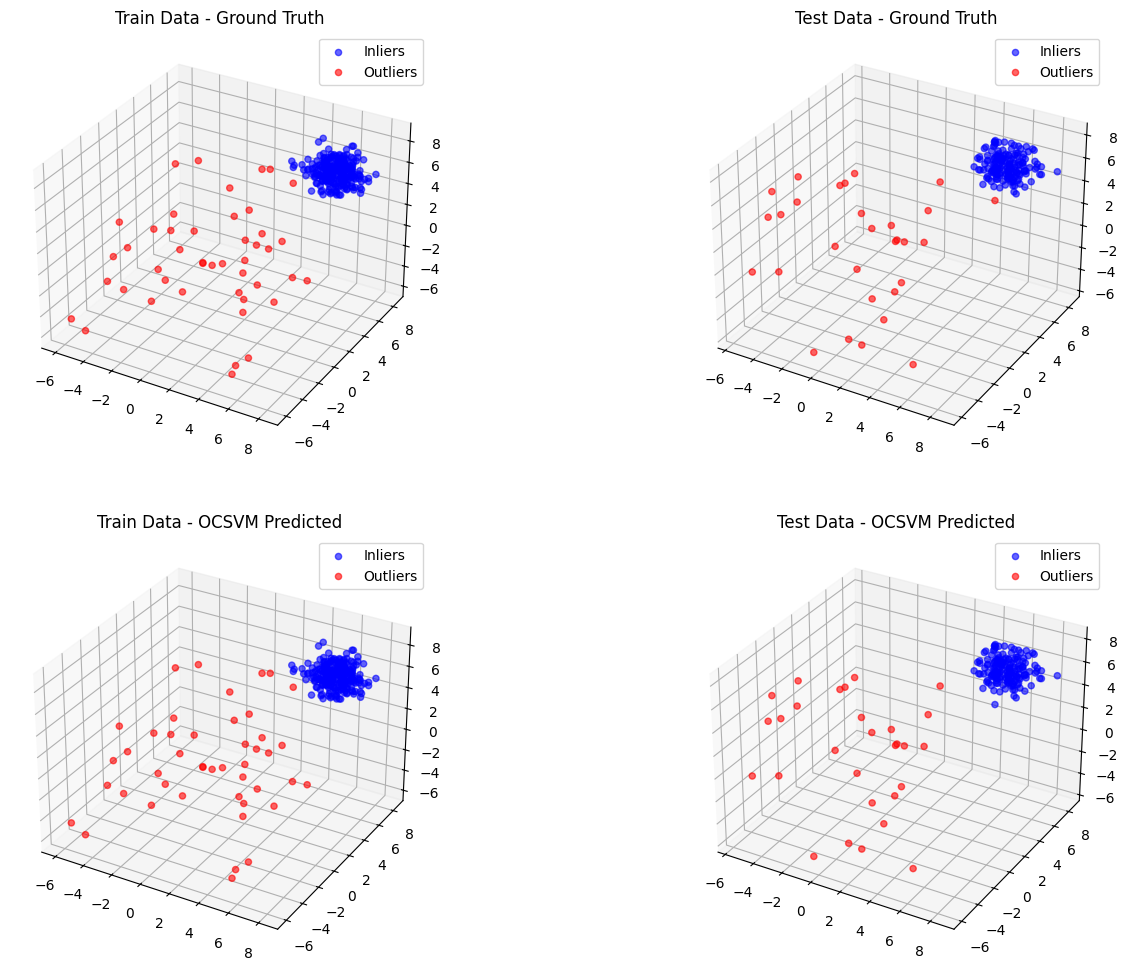

In [ ]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
plot_3d(ax1, X_train, y_train, "Train Data - Ground Truth")

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
plot_3d(ax2, X_test, y_test, "Test Data - Ground Truth")

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
plot_3d(ax3, X_train, ocsvm_linear.predict(X_train), "Train Data - OCSVM Predicted")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
plot_3d(ax4, X_test, y_test_pred_linear, "Test Data - OCSVM Predicted")

plt.show()


In [ ]:
ocsvm_rbf = OCSVM(kernel='rbf', contamination=contamination)
ocsvm_rbf.fit(X_train)
y_test_pred_rbf = ocsvm_rbf.predict(X_test)

print("OCSVM RBF Kernel - Balanced Accuracy:", balanced_accuracy_score(y_test, y_test_pred_rbf))
print("OCSVM RBF Kernel - ROC AUC:", roc_auc_score(y_test, ocsvm_rbf.decision_function(X_test)))

OCSVM RBF Kernel - Balanced Accuracy: 0.9803921568627452
OCSVM RBF Kernel - ROC AUC: 0.9998039215686275


Epoch 1/50, Loss: 1.588207732886076
Epoch 2/50, Loss: 1.7145749740302563
Epoch 3/50, Loss: 1.6641626507043839
Epoch 4/50, Loss: 1.6384295150637627
Epoch 5/50, Loss: 1.6882683597505093
Epoch 6/50, Loss: 1.7730204686522484
Epoch 7/50, Loss: 1.5911513678729534
Epoch 8/50, Loss: 1.6248173043131828
Epoch 9/50, Loss: 1.5971562638878822
Epoch 10/50, Loss: 1.7244799435138702
Epoch 11/50, Loss: 1.5969313159585
Epoch 12/50, Loss: 1.58391547575593
Epoch 13/50, Loss: 1.5989580675959587
Epoch 14/50, Loss: 1.590650051832199
Epoch 15/50, Loss: 1.5824285745620728
Epoch 16/50, Loss: 1.6039134562015533
Epoch 17/50, Loss: 1.585326049476862
Epoch 18/50, Loss: 1.6093063727021217
Epoch 19/50, Loss: 1.6380013599991798
Epoch 20/50, Loss: 1.5889480859041214
Epoch 21/50, Loss: 1.8081149384379387
Epoch 22/50, Loss: 1.5822713077068329
Epoch 23/50, Loss: 1.6224786713719368
Epoch 24/50, Loss: 1.6721312627196312
Epoch 25/50, Loss: 1.5859860554337502
Epoch 26/50, Loss: 1.6854071989655495
Epoch 27/50, Loss: 1.67888971

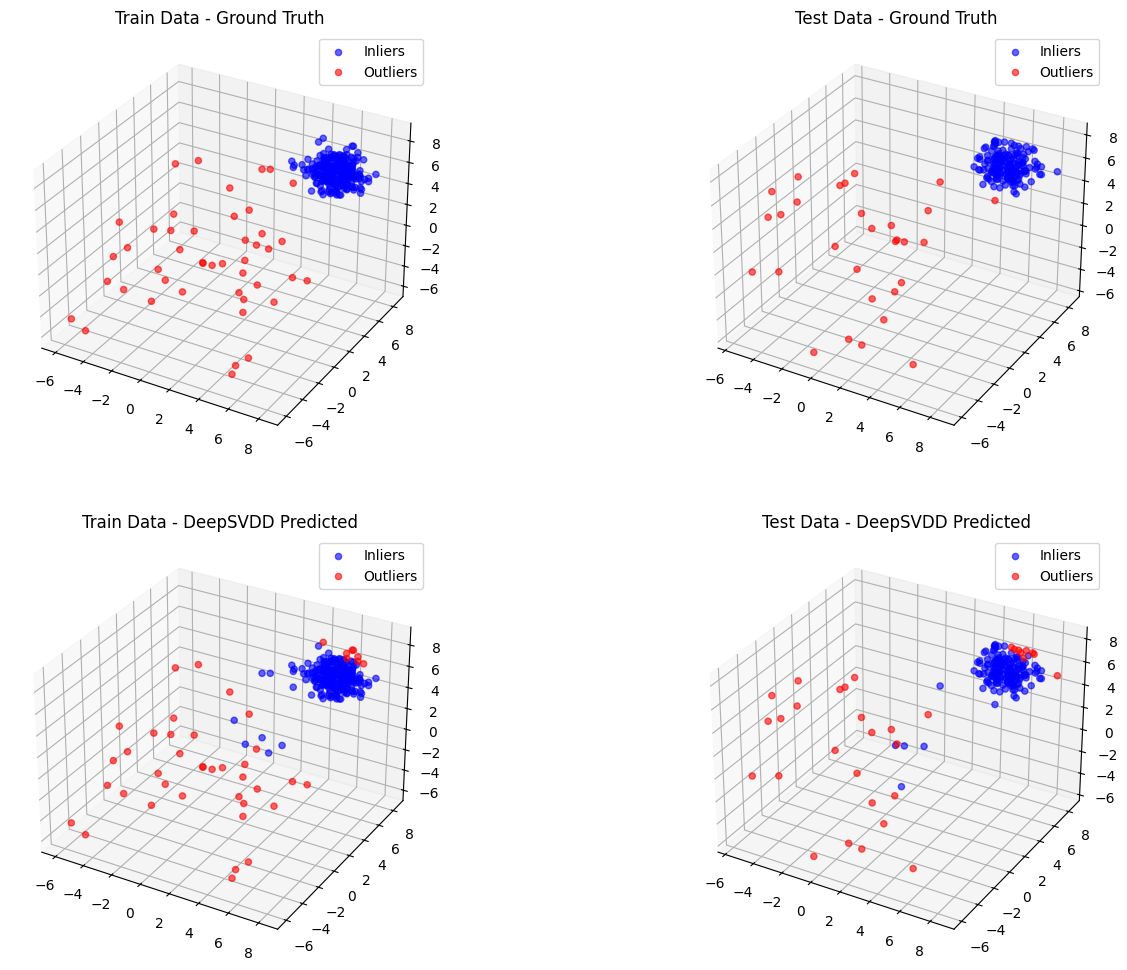

In [ ]:
deep_svdd = DeepSVDD(contamination=contamination, hidden_neurons=[10, 10], epochs=50, n_features=X_train.shape[1])
deep_svdd.fit(X_train)
y_test_pred_svdd = deep_svdd.predict(X_test)

print("DeepSVDD - Balanced Accuracy:", balanced_accuracy_score(y_test, y_test_pred_svdd))
print("DeepSVDD - ROC AUC:", roc_auc_score(y_test, deep_svdd.decision_function(X_test)))

fig2 = plt.figure(figsize=(16, 12))

ax1 = fig2.add_subplot(2, 2, 1, projection='3d')
plot_3d(ax1, X_train, y_train, "Train Data - Ground Truth")

ax2 = fig2.add_subplot(2, 2, 2, projection='3d')
plot_3d(ax2, X_test, y_test, "Test Data - Ground Truth")

ax3 = fig2.add_subplot(2, 2, 3, projection='3d')
plot_3d(ax3, X_train, deep_svdd.predict(X_train), "Train Data - DeepSVDD Predicted")

ax4 = fig2.add_subplot(2, 2, 4, projection='3d')
plot_3d(ax4, X_test, y_test_pred_svdd, "Test Data - DeepSVDD Predicted")

plt.show()

**Task 2**

In [ ]:
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline

In [ ]:
data = loadmat("cardio1.mat")
X = data["X"]
y_pyod = data["y"].ravel()
y = 1 - 2 * y_pyod
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.60, random_state=42, stratify=y
)

contamination_rate = np.mean(y_train == -1)

In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ocsvm", OneClassSVM())
])


In [ ]:
param_grid = {
    "ocsvm__kernel": ["rbf", "sigmoid", "poly"],
    "ocsvm__gamma": ["scale", "auto", 0.01, 0.1, 1],
    "ocsvm__nu": [0.01, contamination_rate, 0.1, 0.2]
}

balanced_acc = make_scorer(balanced_accuracy_score)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=balanced_acc,
    cv=5,
    n_jobs=-1
)

In [ ]:
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

test_balanced_acc = balanced_accuracy_score(y_test, y_pred)


In [ ]:
print("\n===== REZULTATE GRID SEARCH =====")
print("Cei mai buni parametri:", grid.best_params_)
print(f"Balanced Accuracy pe test: {test_balanced_acc:.4f}")



===== REZULTATE GRID SEARCH =====
Cei mai buni parametri: {'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.2}
Balanced Accuracy pe test: 0.8498


**Task 3**

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD

In [13]:
RANDOM_STATE = 42

data = scipy.io.loadmat('shuttle.mat')

In [17]:
X = data['X']
y = data['y'].ravel()

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm,
    y,
    test_size=0.5,
    random_state=RANDOM_STATE,
    stratify=y
)

X_train_inliers = X_train[y_train == 0]
n_features = X_train_inliers.shape[1]

contamination_factor = np.mean(y_train)

print(f"Number of Features: {n_features}")
print(f"Training Samples (Inliers only): {len(X_train_inliers)}")
print(f"Testing Samples: {len(X_test)}")
print(f"Contamination Factor (Training Set): {contamination_factor:.4f}")

def evaluate_model(clf, X_train_data, X_test_data, y_test_labels, model_name):

    clf.fit(X_train_data)

    y_test_scores = clf.decision_function(X_test_data)

    y_test_pred = clf.predict(X_test_data)

    roc_auc = roc_auc_score(y_test_labels, y_test_scores)
    ba = balanced_accuracy_score(y_test_labels, y_test_pred)

    return roc_auc, ba

Number of Features: 9
Training Samples (Inliers only): 22793
Testing Samples: 24549
Contamination Factor (Training Set): 0.0715


In [18]:
results_list = []
ocsvm = OCSVM(
    contamination=contamination_factor,
    kernel='rbf',
    gamma='auto',
)
ocsvm_roc_auc, ocsvm_ba = evaluate_model(
    ocsvm,
    X_train_inliers,
    X_test,
    y_test,
    "OCSVM"
)
results_list.append({
    'Model': 'OCSVM',
    'Architecture': 'N/A',
    'ROC AUC': ocsvm_roc_auc,
    'Balanced Accuracy': ocsvm_ba
})

In [19]:
deepsvdd_std = DeepSVDD(
    n_features=n_features,
    contamination=contamination_factor,
    epochs=10,
    hidden_neurons=[64, 32],
    random_state=RANDOM_STATE
)
deepsvdd_std_roc_auc, deepsvdd_std_ba = evaluate_model(
    deepsvdd_std,
    X_train_inliers,
    X_test,
    y_test,
    "DeepSVDD (Standard: [64, 32])"
)
results_list.append({
    'Model': 'DeepSVDD',
    'Architecture': '[64, 32] (Standard)',
    'ROC AUC': deepsvdd_std_roc_auc,
    'Balanced Accuracy': deepsvdd_std_ba
})

Epoch 1/10, Loss: 551.189218968153
Epoch 2/10, Loss: 551.4121106863022
Epoch 3/10, Loss: 550.9226582050323
Epoch 4/10, Loss: 550.7936601936817
Epoch 5/10, Loss: 550.9707937091589
Epoch 6/10, Loss: 550.7403466105461
Epoch 7/10, Loss: 550.7147367447615
Epoch 8/10, Loss: 550.879188939929
Epoch 9/10, Loss: 550.8051417768002
Epoch 10/10, Loss: 550.7878353595734


In [21]:
deepsvdd_shallow = DeepSVDD(
    n_features=n_features,
    contamination=contamination_factor,
    epochs=10,
    hidden_neurons=[128, 64],
    random_state=RANDOM_STATE
)
deepsvdd_shallow_roc_auc, deepsvdd_shallow_ba = evaluate_model(
    deepsvdd_shallow,
    X_train_inliers,
    X_test,
    y_test,
    "DeepSVDD (Shallow: [128, 64])"
)
results_list.append({
    'Model': 'DeepSVDD',
    'Architecture': '[128, 64] (Shallow)',
    'ROC AUC': deepsvdd_shallow_roc_auc,
    'Balanced Accuracy': deepsvdd_shallow_ba
})


Epoch 1/10, Loss: 1374.9074767231941
Epoch 2/10, Loss: 1375.8667435646057
Epoch 3/10, Loss: 1375.3292327523232
Epoch 4/10, Loss: 1374.5056221783161
Epoch 5/10, Loss: 1375.1504536867142
Epoch 6/10, Loss: 1374.714668393135
Epoch 7/10, Loss: 1374.8661234974861
Epoch 8/10, Loss: 1374.791626572609
Epoch 9/10, Loss: 1375.2113596200943
Epoch 10/10, Loss: 1374.7024022340775


In [23]:
deepsvdd_deep = DeepSVDD(
    n_features=n_features,
    contamination=contamination_factor,
    epochs=10,
    hidden_neurons=[128, 64, 32, 16],
    random_state=RANDOM_STATE
)
deepsvdd_deep_roc_auc, deepsvdd_deep_ba = evaluate_model(
    deepsvdd_deep,
    X_train_inliers,
    X_test,
    y_test,
    "DeepSVDD (Deep: [128, 64, 32, 16])"
)
results_list.append({
    'Model': 'DeepSVDD',
    'Architecture': '[128, 64, 32, 16] (Deep)',
    'ROC AUC': deepsvdd_deep_roc_auc,
    'Balanced Accuracy': deepsvdd_deep_ba
})

Epoch 1/10, Loss: 11.771445780061185
Epoch 2/10, Loss: 11.005540998186916
Epoch 3/10, Loss: 13.213341395836323
Epoch 4/10, Loss: 10.311947558773682
Epoch 5/10, Loss: 12.367146426811814
Epoch 6/10, Loss: 12.412236113566905
Epoch 7/10, Loss: 11.992004369851202
Epoch 8/10, Loss: 12.518496943172067
Epoch 9/10, Loss: 12.57922370871529
Epoch 10/10, Loss: 12.18353416165337


In [24]:
results_df = pd.DataFrame(results_list)

results_df['ROC AUC'] = results_df['ROC AUC'].map('{:.4f}'.format)
results_df['Balanced Accuracy'] = results_df['Balanced Accuracy'].map('{:.4f}'.format)

print(results_df.to_markdown(index=False))

| Model    | Architecture             |   ROC AUC |   Balanced Accuracy |
|:---------|:-------------------------|----------:|--------------------:|
| OCSVM    | N/A                      |    0.9868 |              0.9462 |
| DeepSVDD | [64, 32] (Standard)      |    0.9941 |              0.9565 |
| DeepSVDD | [128, 64] (Shallow)      |    0.9948 |              0.9575 |
| DeepSVDD | [128, 64, 32, 16] (Deep) |    0.9921 |              0.9484 |
